#Porfilio Trujillo Martinez

###Taller 8 Regresión logística

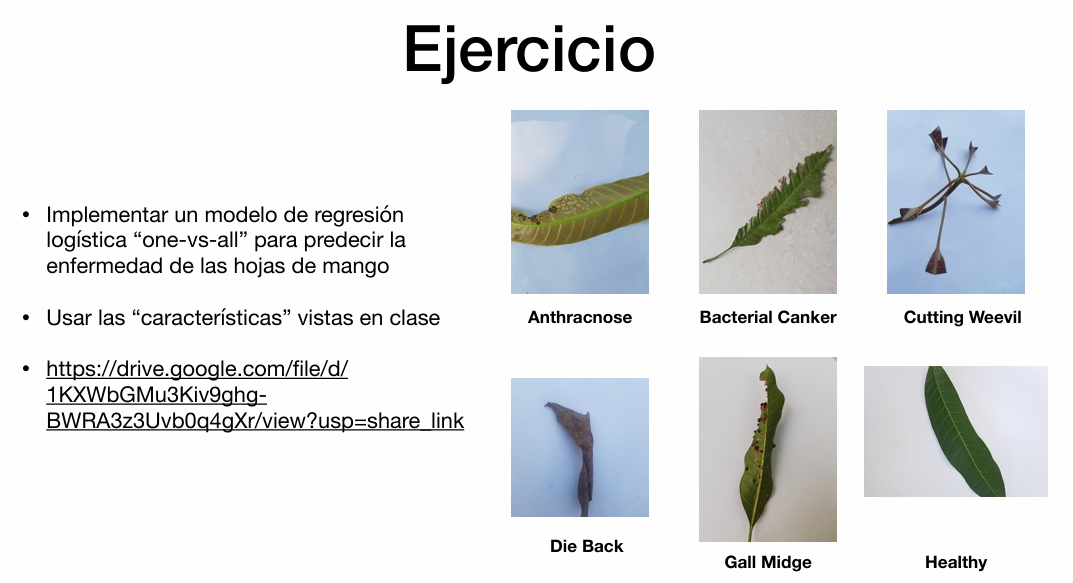

#**Importar librerias**

In [20]:
import os
import cv2
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import add,Dense
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow_hub as hub
import os, random

from skimage.io import imread
from skimage.transform import resize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


###Importar datos

In [ ]:
folder_path = '/content/drive/MyDrive/Clase Visión Computo/Slides/8-slides/mango_leaf_disease'


###Saber cantidad de imágenes por carpetas

In [ ]:
def count_images_in_folder(folder_path):
    # Obtener todas las subcarpetas dentro de la carpeta principal
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    # Recorrer cada subcarpeta
    for subfolder in subfolders:
        files = os.listdir(subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')))
        subfolder_name = os.path.basename(subfolder)
        print(f"En la carpeta '{subfolder_name}' hay {image_count} imágenes.")

# Llamar a la función para contar imágenes en la carpeta principal
count_images_in_folder(folder_path)

En la carpeta 'mango_leaf_disease' hay 0 imágenes.
En la carpeta '__MACOSX' hay 0 imágenes.


###Saber el tamaño de la imagen más pequeña por carpeta


In [ ]:
def find_smallest_image_in_folder(folder_path):
    # Obtener todas las subcarpetas dentro de la carpeta principal
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    # Recorrer cada subcarpeta
    for subfolder in subfolders:
        # Obtener la lista de archivos en la subcarpeta
        files = os.listdir(subfolder)

        smallest_image = None
        smallest_dimensions = float('inf')

        # Buscar la imagen de menor dimensión en la subcarpeta
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_path = os.path.join(subfolder, file)
                # Leer la imagen
                image = cv2.imread(image_path)
                if image is not None:
                    height, width, _ = image.shape
                    # Calcular el número total de píxeles de la imagen
                    total_pixels = height * width
                    # Actualizar la imagen de menor dimensión si es más pequeña que la actual
                    if total_pixels < smallest_dimensions:
                        smallest_dimensions = total_pixels
                        smallest_image = image_path

        # Imprimir el nombre de la subcarpeta y la ruta de la imagen de menor dimensión
        subfolder_name = os.path.basename(subfolder)
        if smallest_image is not None:
            print(f"En la carpeta '{subfolder_name}' la imagen más pequeña es: {smallest_image} con {smallest_dimensions} píxeles.")
        else:
            print(f"No se encontraron imágenes en la carpeta '{subfolder_name}'.")
find_smallest_image_in_folder(folder_path)


No se encontraron imágenes en la carpeta 'mango_leaf_disease'.
No se encontraron imágenes en la carpeta '__MACOSX'.


In [23]:
# Obtener las clases (nombre de las subcarpetas)
clases = os.listdir(folder_path)

# Inicializar listas para almacenar las imágenes y las etiquetas
X = []
y = []

# Leer las imágenes y asignar las etiquetas
for label, clase in enumerate(clases):
    carpeta_clase = os.path.join(folder_path, clase)
    for imagen_nombre in os.listdir(carpeta_clase):
        imagen_ruta = os.path.join(carpeta_clase, imagen_nombre)
        imagen = imread(imagen_ruta)
        # Redimensionar la imagen a un tamaño común (ajustar según sea necesario)
        imagen_redimensionada = resize(imagen, (100, 100, 3), anti_aliasing=True)
        X.append(imagen_redimensionada.flatten())
        y.append(label)

# Convertir las listas en matrices numpy
X = np.array(X)
y = np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una lista para almacenar los modelos de regresión logística
models = []

# Entrenar un modelo para cada clase utilizando el enfoque "one-vs-all"
for class_label in np.unique(y_train):
    # Crear un clasificador de regresión logística
    model = LogisticRegression(solver='liblinear')

    # Convertir las etiquetas a binarias para la clase actual vs. las demás clases
    y_train_binary = np.where(y_train == class_label, 1, 0)

    # Entrenar el modelo
    model.fit(X_train, y_train_binary)

    # Agregar el modelo entrenado a la lista
    models.append(model)

# Hacer predicciones en el conjunto de prueba
y_pred = np.zeros((len(X_test), len(models)), dtype=int)
for i, model in enumerate(models):
    y_pred[:, i] = model.predict(X_test)

# Obtener las predicciones finales combinando los resultados de todos los modelos
final_predictions = np.argmax(y_pred, axis=1)

# Calcular la precisión
accuracy = accuracy_score(y_test, final_predictions)
print("Precisión:", accuracy)

# Mostrar un informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, final_predictions, target_names=clases))


Precisión: 0.665
Informe de clasificación:
                  precision    recall  f1-score   support

     Sooty Mould       0.35      0.74      0.48       123
  Powdery Mildew       0.73      0.64      0.68        86
  Cutting Weevil       0.99      0.95      0.97       112
Bacterial Canker       0.68      0.61      0.65       101
      Gall Midge       0.38      0.21      0.27       104
     Anthracnose       0.93      0.69      0.79        90
         Healthy       0.89      0.73      0.80        91
        Die Back       0.99      0.73      0.84        93

        accuracy                           0.67       800
       macro avg       0.74      0.66      0.68       800
    weighted avg       0.73      0.67      0.68       800

